#Linear Regression in AMD stock price prediction

In [2]:
#import libraries
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
#load data
datafile = pd.read_csv("AMD (1980 -11.07.2023).csv")
datafile.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-18,0.0,3.125000,2.937500,3.031250,3.031250,727200
1,1980-03-19,0.0,3.083333,3.020833,3.041667,3.041667,295200
2,1980-03-20,0.0,3.062500,3.010417,3.010417,3.010417,159600
3,1980-03-21,0.0,3.020833,2.906250,2.916667,2.916667,130800
4,1980-03-24,0.0,2.916667,2.635417,2.666667,2.666667,436800


In [4]:
#Add Prev_close column to store previous close price
series_shifted = datafile['Close'].shift()
datafile['Prev_close'] = series_shifted
datafile.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Prev_close
0,1980-03-18,0.0,3.125000,2.937500,3.031250,3.031250,727200,NaN
1,1980-03-19,0.0,3.083333,3.020833,3.041667,3.041667,295200,3.031250
2,1980-03-20,0.0,3.062500,3.010417,3.010417,3.010417,159600,3.041667
3,1980-03-21,0.0,3.020833,2.906250,2.916667,2.916667,130800,3.010417
4,1980-03-24,0.0,2.916667,2.635417,2.666667,2.666667,436800,2.916667


In [5]:
#Drop unused column
datafile = datafile.drop(columns = ['Adj Close'])
datafile.head()

,Date,Open,High,Low,Close,Volume,Prev_close
0,1980-03-18,0.0,3.125000,2.937500,3.031250,727200,NaN
1,1980-03-19,0.0,3.083333,3.020833,3.041667,295200,3.031250
2,1980-03-20,0.0,3.062500,3.010417,3.010417,159600,3.041667
3,1980-03-21,0.0,3.020833,2.906250,2.916667,130800,3.010417
4,1980-03-24,0.0,2.916667,2.635417,2.666667,436800,2.916667


In [6]:
datafile.shape

(10919, 7)

In [152]:
#null entries check (need to remove those data)
datafile.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Prev_close    1
dtype: int64

In [153]:
#drop / remove NaN row or column
#inplace = true to execute dropna right on it file so python
#dont have to create a copy and we have to re-initialize and
#add to a new datafile variable
datafile.dropna(inplace = True)
datafile

,Date,Open,High,Low,Close,Volume,Prev_close
1,1980-03-19,0.000000,3.083333,3.020833,3.041667,295200,3.031250
2,1980-03-20,0.000000,3.062500,3.010417,3.010417,159600,3.041667
3,1980-03-21,0.000000,3.020833,2.906250,2.916667,130800,3.010417
4,1980-03-24,0.000000,2.916667,2.635417,2.666667,436800,2.916667
5,1980-03-25,0.000000,2.750000,2.552083,2.604167,645600,2.666667
...,...,...,...,...,...,...,...
10914,2023-07-03,115.160004,116.730003,114.510002,115.820000,31860000,113.910004
10915,2023-07-05,116.099998,117.660004,113.860001,113.949997,49501600,115.820000
10916,2023-07-06,112.070000,113.790001,110.309998,113.480003,42342000,113.949997
10917,2023-07-07,114.160004,115.330002,113.040001,113.169998,37135100,113.480003


In [154]:
#check file info
datafile.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10918 entries, 1 to 10918
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        10918 non-null  object 
 1   Open        10918 non-null  float64
 2   High        10918 non-null  float64
 3   Low         10918 non-null  float64
 4   Close       10918 non-null  float64
 5   Volume      10918 non-null  int64  
 6   Prev_close  10918 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 682.4+ KB


In [155]:
datafile.describe()

,Open,High,Low,Close,Volume,Prev_close
count,10918.000000,10918.000000,10918.000000,10918.000000,1.091800e+04,10918.000000
mean,16.844206,17.512060,16.762901,17.140225,1.846657e+07,17.130099
std,23.318226,23.610291,22.616046,23.122284,2.815709e+07,23.104246
min,0.000000,1.690000,1.610000,1.620000,0.000000e+00,1.620000
25%,4.965000,5.437500,5.125000,5.302500,1.226950e+06,5.300000
50%,9.875000,10.062500,9.630000,9.875000,6.833200e+06,9.875000
75%,16.125000,16.404688,15.807500,16.120001,2.284092e+07,16.113438
max,163.279999,164.460007,156.100006,161.910004,3.250584e+08,161.910004


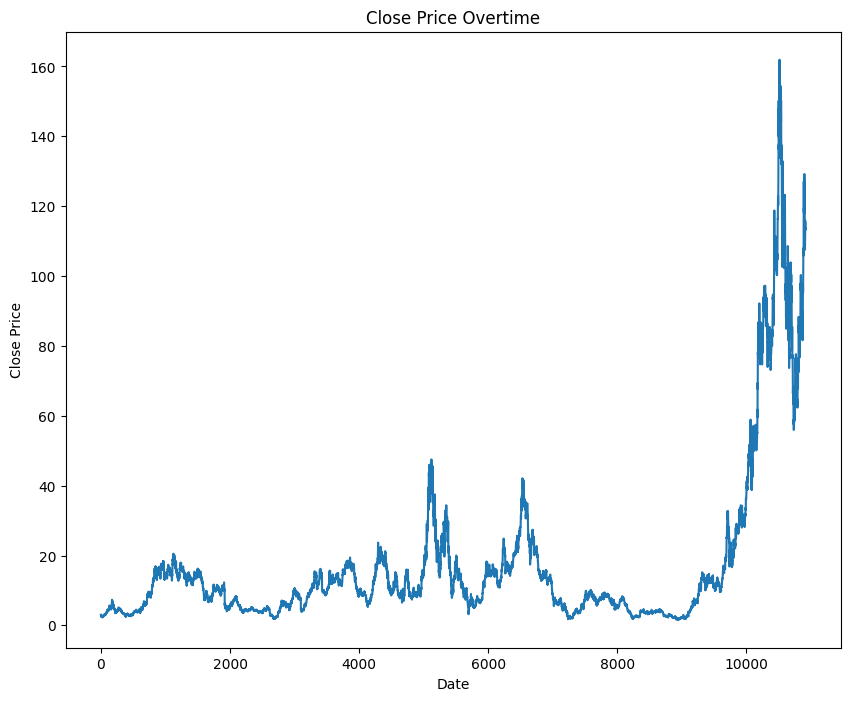

In [156]:
#plot close price (Draw close price figure)
datafile['Close'].plot(figsize = (10, 8))
plt.title("Close Price Overtime")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

In [157]:
#define target x and y (calculate close)
x = datafile[['Open', 'Prev_close', 'High', 'Low']]
y = datafile['Close']

In [158]:
#allocate data for training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [159]:
print(x_train.shape, x_test.shape)

(8188, 4) (2730, 4)


In [160]:
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [161]:
#print regressor
#
print(regressor.coef_)
print(regressor.intercept_)

[-0.04259091 -0.33022824  0.69590042  0.67628903]
-0.011557549188673022


In [162]:
#predicted value
predicted = regressor.predict(x_test)
print(x_test)
print(predicted)

            Open  Prev_close       High        Low
1534   15.000000   15.125000  15.437500  14.875000
4440   14.375000   15.000000  15.437500  14.312500
7604    8.300000    8.270000   8.670000   7.920000
1313   14.625000   14.625000  14.687500  14.312500
5976   17.549999   17.860001  17.559999  16.850000
...          ...         ...        ...        ...
10212  79.349998   78.930000  79.720001  76.540001
7030    7.100000    7.150000   7.490000   6.980000
9568   12.140000   12.070000  12.430000  12.050000
3853   17.562500   17.625000  17.875000  17.375000
4783    8.562500    8.562500   9.000000   8.468750

[2730 rows x 4 columns]
[15.15763889 14.84512416  8.2936162  ... 12.28485911 17.60990896
  8.78660508]


In [163]:
predicted.shape

(2730,)

In [164]:
#Comparison predicted to actual test
_datafile = pd.DataFrame({"Actual": y_test, "Predicted": predicted})
print(_datafile)

          Actual  Predicted
1534   15.250000  15.157639
4440   15.312500  14.845124
7604    8.380000   8.293616
1313   14.375000  14.436387
5976   17.360001  16.958576
...          ...        ...
10212  76.660004  77.784285
7030    7.460000   7.257707
9568   12.420000  12.284859
3853   17.875000  17.609909
4783    8.812500   8.786605

[2730 rows x 2 columns]


In [165]:
#Score
regressor.score(x_test, y_test)

0.9997232796876515

In [166]:
import math
print("Mean Absolute Error ", metrics.mean_absolute_error(y_test, predicted))
print("Mean Square Error ", metrics.mean_squared_error(y_test, predicted))
print("Root Mean Error ", math.sqrt(metrics.mean_squared_error(y_test, predicted)))

Mean Absolute Error  0.18989620796015894
Mean Square Error  0.14985873566253555
Root Mean Error  0.38711592018739754


In [167]:
predicted = regressor.predict(x)
print(predicted)

[  3.17608707   3.15110517   3.06198172 ... 111.37372445 114.35787301
 111.17562557]


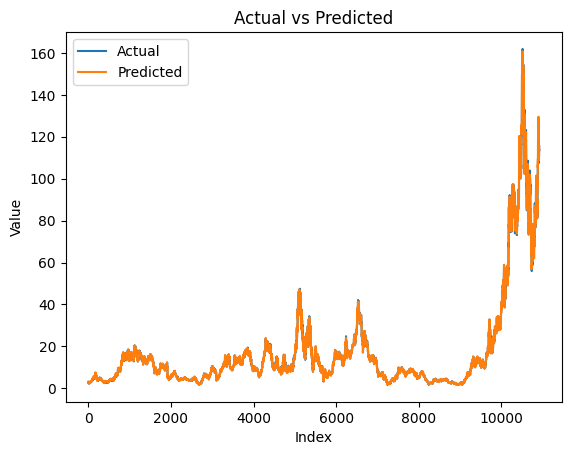

In [168]:
#plot the graph
plt.plot(y, label = "Actual")
plt.plot(predicted, label = "Predicted")
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()